最初に必要なライブラリを読み込みます。

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit, QubitBra, measure_all, measure_all_oneshot,measure_partial
from sympy.physics.quantum.gate import H,X,Y,Z,S,T,CPHASE,CNOT,SWAP,UGate,CGateS,gate_simp
from sympy.physics.quantum.gate import IdentityGate as _I
from sympy.physics.quantum.qft import *

from sympy.printing.dot import dotprint
init_printing()

%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate


### 【復習問題１】いつもの説明資料の量子回路をプログラミング手順にそって計算しましょう。

![計算例](quantum_calc_sample.png)

In [2]:
### 1. 計算に必要な量子ビット（量子レジスタ）を準備して、その値を初期化する
## ２量子ビットを 0 で初期化してください。
Qubit('00')

In [3]:
### 2. 量子計算をユニタリ行列（ゲート演算子）で記述する
## Hadamard のテンソル積 の行列表現を表示してください。

h2=[]     #←[]を書き換えて、2量子ビットにそれぞれHadamardを作用するゲート操作を h2 に代入してください。
[]            #←[]を書き換えて、h2 の行列表現を表示してください。

In [4]:
## CNOT を Hadamard で挟んだゲート操作 の行列表現を表示してください。

hCXh=[]     #←[]を書き換えて、H - CNOT - H の量子回路を hCXh に代入してください。
[]                #←[]を書き換えて、hCXh の行列表現を表示してください。

In [5]:
### 3. ユニタリ行列を量子ビットに作用する
## Hadamard のテンソル積 を `Qubit('00')` に作用してください。

q1 = []         #←[]を書き換えて、`Qubit('00')` に `h2` を作用させて計算してください。
q1  # q1を Jupyter で表示します。

In [6]:
## 次に、CNOT を Hadamard で挟んだゲート操作 を 前の状態に作用してください。

q2 = []         #←[]を書き換えて、前の状態 `q1` に `hCXh` を作用させて計算してください。
q2  # q2を Jupyter で表示します。

In [7]:
### 4. 測定する
## measure_all() を使って、それぞれの状態が測定される確率を表示してください。

[]       #←[]を書き換えて、`q2`のそれぞれの状態が測定される確率を表示してください。

### 【復習問題２】グローバーのアルゴリズム

<strong>
次の「課題の初期状態」 quest_state を入力として、この量子状態に $\lvert 111 \rangle $ が含まれるか  

グローバーのアルゴリズムを使って調べてください。  　  
</strong>

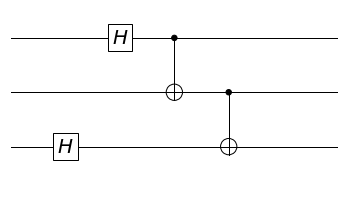

In [8]:
# 課題の初期状態
quest_state = CNOT(1,0)*CNOT(2,1)*H(2)*H(0)*Qubit('000')
CircuitPlot(quest_state,nqubits=3)

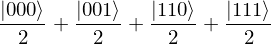

In [9]:
# 計算した初期状態を init_state とします。
init_state = qapply(quest_state)
init_state

In [10]:
# 以降で役立ちそうな関数を定義します。
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s):
       h = H(i)*h
    return h
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # ＣＣＺ演算子を定義します。
def DOp(n): return (Qubit('0'*n)*QubitBra('0'*n)*2-_I(0))     # ゲート操作で計算するには、上記コメントのような演算になります。
h_3 = hadamard(0,3)
d_3 = h_3 * DOp(3) * h_3    # 平均値周りの反転操作
# represent(d_3,nqubits=3)

In [12]:
# | 111 > の検索する量子回路を作成する。
grover_7= []     #←[]を書き換えて、 | 111 > の検索する量子回路を `grover_7` に代入してください。
[]                        #←[]を書き換えて、grover_7 の量子回路図を表示してください。

In [13]:
# 上で作った量子回路を初期状態と作用させて measure_all() で、 | 111 > を検出する確率が高いことを確認する。

[]                       #←[]を書き換えて、全ての状態が測定される確率を表示してください。

### 【復習問題３】量子テレポーテーション

<strong>
次の量子テレポーテーションのプログラムから、Bob の手元にある量子状態を考察し、

Alice の測定結果（古典通信で送られる情報）をもとに、Bob の量子状態が Alice が持っていた量子状態(ini_alice)と一致することを確認してください。  　  
</strong>

[(|000>, 1/2), (exp(I*pi/4)*|001>, 1/2)]


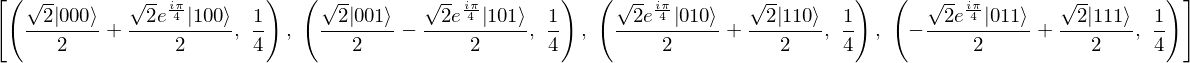

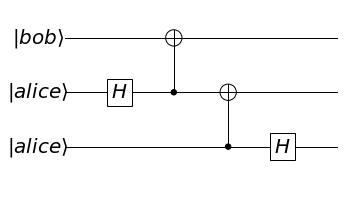

In [14]:
# Alice と Bob が対象としている量子ビットを測定する操作を準備します。
def alice(qbit): return measure_partial(qbit,(0,1))
def bob(qbit):  return measure_partial(qbit,(2,))

def U(x): return T(x)*X(x)*H(x)
ini_alice = U(0) * Qubit('000')
print(measure_partial(qapply(ini_alice),(0,)))   # Alice の初期の量子状態を表示します。

# Alice と Bob は量子もつれの状態を共有します。
pairs = CNOT(1,2)*H(1)

# Bell測定を行います。
bell_meas = H(0)*CNOT(0,1)*pairs
CircuitPlot(bell_meas,nqubits=3, labels = ['alice','alice','bob'])     # 量子テレポーテーションの量子回路図を表示します。
teleportated = qapply(bell_meas*ini_alice)

alice(teleportated)   # 量子テレポーテーションを行ったあとの、Alice の量子状態を表示します。

### 【課題１−１】スワップテスト
<strong>
スワップテストのための 制御SWAP（Fredkin） 回路を作成してください。
</strong>

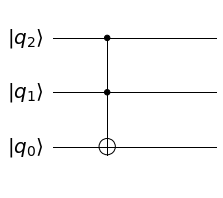

In [15]:
# CCXゲート, Toffoliゲートは、次のように表せます。
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))
def Toffoli(c1,c2,t):  return CGateS((c1,c2),X(t))
CircuitPlot(CCX(1,2,0),3,labels=labeller(3)[::-1])

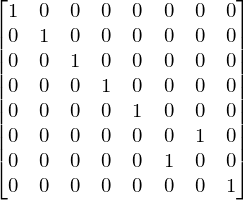

In [16]:
#### 制御SWAP（Fredkin）ゲートを作成してください。

CSWAP=CNOT(0,1)*Toffoli(1,2,0)*CNOT(0,1)        #←[]を書き換えて、制御SWAP回路を `CSWAP` に代入してください。
represent(CSWAP,nqubits=3)                        #←[]を書き換えて、制御SWAPの行列表現を表示してください。

### 【課題１−２】スワップテスト
<strong>
課題の初期状態、 $|q_0>=U(0) |0> $と$|q_1>= |1> $の内積をスワップテストを使って求めてください。
</strong>

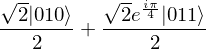

In [17]:
# 課題の初期状態、 q0 (=U(0) |0>) と q1(= |1> )の内積を求めるために、量子状態を準備します。
# スワップテストで測定する量子ビット q2 もあわせて、３量子ビットを準備します。
def U(x): return T(x)*X(x)*H(x)
state_1 = U(0) * Qubit('010')
qapply(state_1)

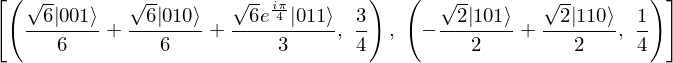

In [18]:
# スワップテストを行う想定で、測定確率をmeare_partial()で算出します。
measure_partial(qapply(H(2)*CSWAP*H(2)*state_1),(2,))

この結果から、スワップテストで測定した結果、 q2 = |0> となるケースの確率は、$\frac{3}{4}$ です。

$ \frac{1}{2}(1+ \langle q_0 | q_1\rangle^{2})$ の値がこの結果になることから、内積 $ \langle q_0 | q_1\rangle $ が求まります。

## 【課題２】量子フーリエ変換
<strong>
問１）  
１. ３量子ビットを対象にした、量子フーリエ変換を行います。  

　|000>, |001>, ..., |110>, |111> の全ての状態のそれぞれの QFT の結果を出してください。    
　   
　　　ヒント）sympy.physics.quantum.qft の QFT 関数を使います。

２. QFT(0,3) の量子回路図を CircuitPlot() で作図してください。
</strong>

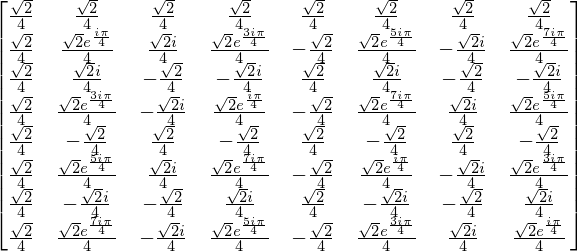

In [19]:
## QFT(0,3) の行列表現を表示してください。

from sympy.physics.quantum.qft import *     # 必要なパッケージをimportします。
represent(QFT(0,3), nqubits=3)

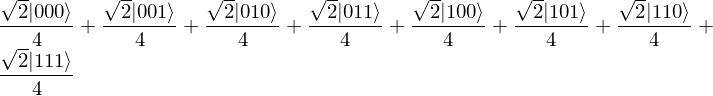

In [20]:
# |000> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('000'))

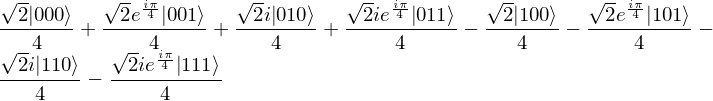

In [21]:
# |001> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('001'))

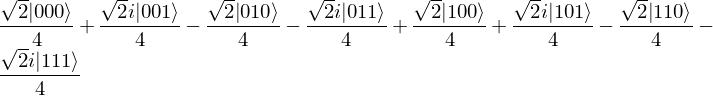

In [22]:
# |010> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('010'))

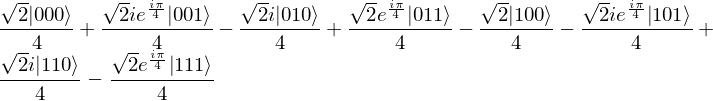

In [23]:
# |011> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('011'))

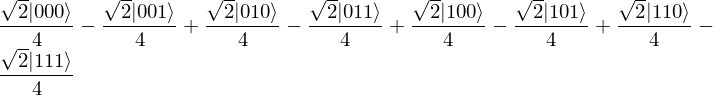

In [24]:
# |100> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('100'))

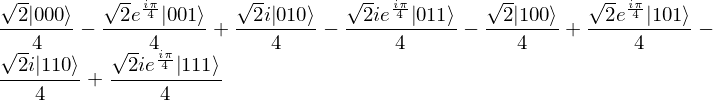

In [25]:
# |101> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('101'))

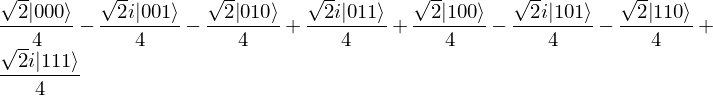

In [26]:
# |110> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('110'))

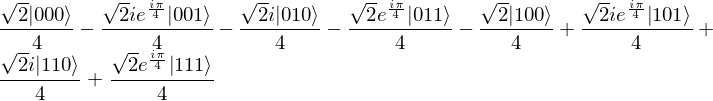

In [27]:
# |111> を量子フーリエ変換してください。

qapply(QFT(0,3)*Qubit('111'))

In [28]:
### QFT(0,3) は、SymPy ではひと塊りのまとまったオペレータとして定義されています。
### 基本ゲートを知るためには、decompose() を使います。
QFT(0,3).decompose()

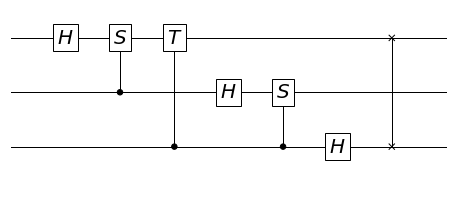

In [29]:
# QFT(0,3) の量子回路図を CircuitPlot() で作図してください。


CircuitPlot(QFT(0,3).decompose(), nqubits=3)

In [30]:
# decompose() した上記の回路を改めて、定義しなおします。
qft3_decomp = SWAP(0,2)*H(0)*CGateS((0,),S(1))*H(1)*CGateS((0,),T(2))*CGateS((1,),S(2))*H(2)
qft3_decomp

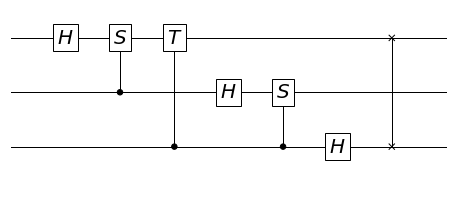

In [31]:
# 上記で定義しなおした QFT の量子回路図を CircuitPlot() で作図します。
# QFT(0,3).decompose() の量子回路図と比較してください。
CircuitPlot(qft3_decomp,nqubits=3)

<strong>
問２）  

１. ３量子ビットを対象にした、量子フーリエ変換を基本的な量子ゲートだけで表してください。  
　  $\sqrt{T}$ゲートである Rk(n,4) は利用してもよい。
　  

・演算をテンソル積で表してください。  

・（この場合の量子回路図は、うまく描けません。）  
　  
　  
</strong>

（ヒント）$c_{g}$ をグローバル位相として、Z軸回転
$ R_{z\theta} = c_{g} X \cdot R_{z\theta/2}^{\dagger} \cdot X \cdot R_{z\theta/2} $
と表せることを使います。

⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦


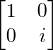

In [32]:
# S = c・X・T†・X・T であることを示します。
pprint(represent(S(0),nqubits=1))
represent(exp(I*pi/4)*X(0)*T(0)**(-1)*X(0)*T(0),nqubits=1)

⎡1   0  ⎤
⎢       ⎥
⎢    ⅈ⋅π⎥
⎢    ───⎥
⎢     4 ⎥
⎣0  ℯ   ⎦


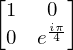

In [33]:
# T = c・X・sqrt(T)†・X・sqrt(T) であることを示します。
pprint(represent(T(0),nqubits=1))
represent(exp(I*pi/8)*X(0)*Rk(0,4)**(-1)*X(0)*Rk(0,4),nqubits=1)

In [34]:
# qft3_decomp = SWAP(0,2)*H(0)*CGateS((0,),S(1))*H(1)*CGateS((0,),T(2))*CGateS((1,),S(2))*H(2)
# qft3_decomp を見ながら、制御Ｓゲートを置き換えて、qft3_decomp2 へ代入します。

qft3_decomp2 = SWAP(0,2)*H(0)*CNOT(0,1)*T(1)**(-1)*CNOT(0,1)*T(1)*H(1)*CGateS((0,),T(2))*CNOT(1,2)*T(2)**(-1)*CNOT(1,2)*T(2)*H(2)
qft3_decomp2

In [35]:
# qft3_decomp2 = SWAP(0,2)*H(0)*CNOT(0,1)*T(1)**(-1)*CNOT(0,1)*T(1)*H(1)*CGateS((0,),T(2))*CNOT(1,2)*T(2)**(-1)*CNOT(1,2)*T(2)*H(2)
# qft3_decomp を見ながら、制御Ｔゲートを置き換えて、qft3_decomp3 へ代入します。

qft3_decomp3 = SWAP(0,2)*H(0)*CNOT(0,1)*T(1)**(-1)*CNOT(0,1)*T(1)*H(1)*CNOT(0,2)*Rk(2,4)**(-1)*CNOT(0,2)*Rk(2,4)*CNOT(1,2)*T(2)**(-1)*CNOT(1,2)*T(2)*H(2)
qft3_decomp3

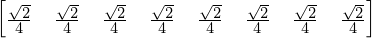

In [36]:
# |000> の量子フーリエ変換の結果をみます。
### ゲート操作が少し複雑になるため、SymPyがうまく判断できません。
### represent()で計算します。解答例では、結果が縦ベクトルで行数が長くなるのを嫌い、transpose()します。

# （解答例）transpose(represent(qft3_decomp2*Qubit('000'), nqubits=3))


transpose(represent(qft3_decomp2*Qubit('000'), nqubits=3))

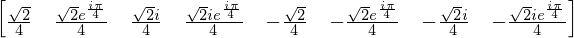

In [37]:
# |001> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。

exp(I*pi/4)*transpose(represent(qft3_decomp2*Qubit('001'), nqubits=3))

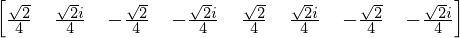

In [38]:
# |010> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。

exp(I*pi/4)*transpose(represent(qft3_decomp2*Qubit('010'), nqubits=3))

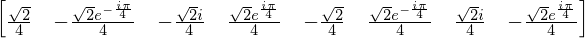

In [39]:
# |011> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/2) をかけると同じになります。

exp(I*pi/2)*transpose(represent(qft3_decomp2*Qubit('011'), nqubits=3))

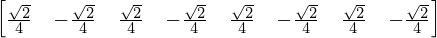

In [40]:
# |100> の量子フーリエ変換の結果をみます。

transpose(represent(qft3_decomp2*Qubit('100'), nqubits=3))

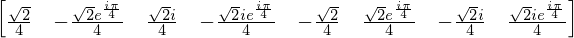

In [41]:
# |101> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。

exp(I*pi/4)*transpose(represent(qft3_decomp2*Qubit('101'), nqubits=3))

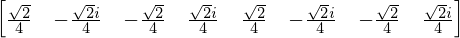

In [42]:
# |110> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。


exp(I*pi/4)*transpose(represent(qft3_decomp2*Qubit('110'), nqubits=3))

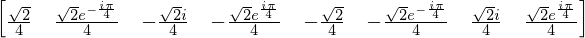

In [43]:
# |111> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/2) をかけると同じになります。


exp(I*pi/2)*transpose(represent(qft3_decomp2*Qubit('111'), nqubits=3))